In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
np.random.exponential()

class Simulation:
  def __init__(self):

    '''
      * The N can be in range 0-10000
      * THe policy options are FIFO,LIFI,SJF,SIRO
    '''

    #For task 2
    self.listOfQT=[]
    self.listOfBT=[]
    self.listOfTime = []
    #End task 2

    self.N = 10
    self.policy = 'FIFO'
    #Created randomy 1000 numbers
    self.interarrivals = list(np.random.exponential(scale = 1/3, size=10005))
    self.service_times = list(np.random.exponential(scale = 1/4, size=10005))

    print(self.interarrivals)
    print(self.service_times)
    self.clock= 0.0

    self.next_arrival=self.interarrivals.pop(0)
    self.next_departure= float('inf')

    self.num_in_queue= 0
    self.times_of_arrivalqueue= []         #store times of arrivals who are waiting in the queue
    self.service_times_in_queue= []   #store service times of waiting customers in the queue

    self.total_delay=0.0
    self.num_of_delays= 0.0
    self.area_under_q= 0.0
    self.area_under_b= 0.0

    self.server_status= 0        #0 for IDLE , 1 for BUSY
    self.last_event_time=0.0     #we will need to store last event clock time

  def start(self,n,policy):
    self.N = n
    self.policy = policy
    while self.num_of_delays<= self.N:
      self.timing()
      # After doing an arrival or an departure we can note the status of Q_T and B_T
      self.listOfQT.append(self.num_in_queue)
      self.listOfBT.append(self.server_status)
      self.listOfTime.append(s.clock)

  def timing(self):
    self.clock= min(self.next_arrival,self.next_departure)  #First set clock to minimum time of next event
    self.update_register()
    if self.next_arrival<= self.next_departure:
      self.arrival()
      print("Arrival at Clock:" +str(self.clock))

    else:
      self.departure()
      print("Departure at "+str(self.clock))

    print("Server Status:"+str(self.server_status))
    print("Times of arrivals in Queue: "+ str(self.times_of_arrivalqueue))
    print("Service times in Queue: "+str(self.service_times_in_queue))
    print("Number of Delays: "+str(self.num_of_delays))
    print("Total Delay:" +str(self.total_delay))
    print("Next Arrival Time: "+str(self.next_arrival))
    print("Next Departure Time: "+str(self.next_departure))
    print("Area Under Q(t): " + str(self.area_under_q))
    print("Area Under b(t): " + str(self.area_under_b))
    print(" ")

  def arrival(self):
    #Schedule next arrival , new_arrival = previous_arrival + inter_arrival time of next customer
    self.next_arrival+= self.interarrivals.pop(0)

    if self.server_status==0:   #server is idle
      self.server_status= 1    #make server BUSY
      delay=0.0            #so delay is zero
      self.total_delay += delay
      self.num_of_delays +=1   #increase the number of customers delayed

      #schedule next departure, pop the first element of service_times list to get service time of this customer
      self.next_departure = self.clock+ self.service_times.pop(0)

    else:     #Server is BUSY
      #increase queue length, this customer will have to wait in the queue
      self.num_in_queue+=1

      #store the arrival time and service time of this customer in seperate lists
      self.times_of_arrivalqueue.append(self.clock)
      self.service_times_in_queue.append(self.service_times.pop(0))

  def departure(self):
    #check number of customers in the queue
    if self.num_in_queue==0:  #if no customer in the queue
      #make server IDLE
      self.server_status= 0
      #schedule next departure= infinity
      self.next_departure= float('infinity')

    else:
      #if queue not empty, pop one customer, decrease queue length
      self.num_in_queue-=1
      self.num_of_delays+=1
      #AS FIFO, pop first arrival and service time from the queue. IF LIFO we have to pop last arrival and service time
      #For SJF, find the index of minimum service time from  service_times_in_queue list.
      #Then pop the arrival of that index from times_of_arrivalqueue for delay count and others.

      if self.policy == 'FIFO':
        arrival= self.times_of_arrivalqueue.pop(0)
        self.next_departure = self.clock + self.service_times_in_queue.pop(0)
      elif self.policy == "LIFO":
        arrival = self.times_of_arrivalqueue.pop(-1)
        self.next_departure = self.clock + self.service_times_in_queue.pop(-1)
      elif self.policy == "SJF":
        idx = np.argmin(self.service_times_in_queue)
        arrival = self.times_of_arrivalqueue.pop(idx)
        self.next_departure = self.clock + self.service_times_in_queue.pop(idx)
      elif self.policy == "SIRO":
        idx = np.random.randint(0,(len(self.times_of_arrivalqueue)))
        idx = min(idx,len(self.times_of_arrivalqueue)-1)                                # List e 12 element thakle ar idx=12 hoile crush dito. So min(idx,11) in this case
        arrival = self.times_of_arrivalqueue.pop(idx)
        self.next_departure = self.clock + self.service_times_in_queue.pop(idx)
      delay= self.clock- arrival
      self.total_delay+=delay


  def update_register(self):
    time_differnce= self.clock - self.last_event_time
    self.area_under_q+=self.num_in_queue*time_differnce
    self.area_under_b+=self.server_status*time_differnce
    self.last_event_time=self.clock

#-------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

s= Simulation()

n = int(input("Please enter the number of jobs to be delayed:"))
p = input("Please input the policy:")
s.start(n,p)         # As paramiter for start, we have to expected delayed customer, and policy to select from queue


print('Average Delay {}'.format(s.total_delay/6))
print("Expected Number of Customers in the queue : {}".format(s.area_under_q/s.clock))
print("Expected Utilization of the server : {}".format(s.area_under_b/s.clock))

#print(len(s.listOfTime))








[0.41864358765527926, 0.30774104860135626, 0.2624003841057569, 0.18368283036516642, 0.34605309831453646, 0.19183973305621327, 0.7411748043442189, 1.1049707273512712, 0.1612007003007511, 0.5229653799897227, 0.25089136984552945, 0.27981094891294095, 0.8660847179751469, 0.02456178497094929, 0.03038700970633349, 0.00680852889474165, 0.5958292265382961, 0.5019280772884052, 0.6801047603151835, 1.281740612722283, 0.5350798529833819, 0.20630981953765617, 0.5055119922933838, 0.04195813727684759, 0.3404772954640243, 0.051576560909215065, 0.9648068165638419, 0.24594242610368622, 0.1785219061002521, 0.10242678436348458, 0.496084946242245, 0.20302747210102834, 0.28011156895587064, 0.00632285722079463, 0.32046030973161976, 0.31566555928125933, 0.3198493242430786, 0.9593050262470078, 0.38171298621679206, 0.1485061642437464, 0.19151080291916103, 0.39870260037779004, 0.020705098641771898, 0.3663041600193465, 0.3701991444314601, 0.07873556844466925, 0.0460095625441501, 0.12632065537882517, 0.15070068544

[]

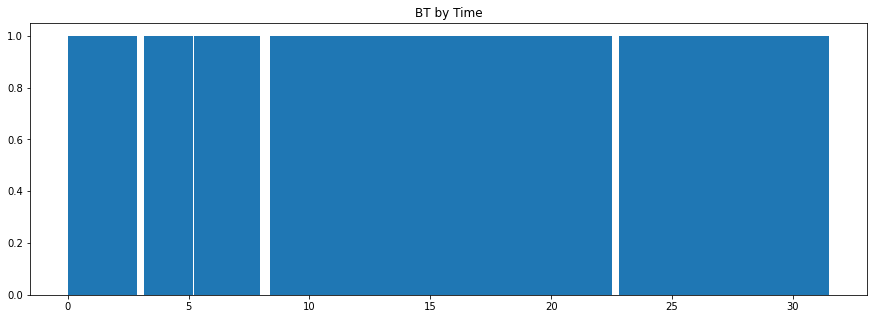

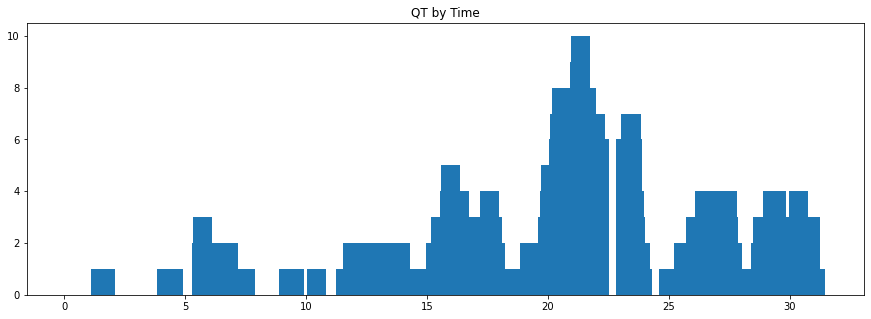

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(15,5))
plt.bar(s.listOfTime,s.listOfBT)
plt.title("BT by Time")
plt.plot()

print("\n\n")

plt.figure(figsize=(15,5))
plt.bar(s.listOfTime,s.listOfQT)
plt.title("QT by Time")
plt.plot()